# Unit 1 (Python) Project

## Problem Statement:
Using the [NY Times covid data](https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv) (https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv) create a US Wide level epidmic curve.

The epidemic curve should be a chart that contains:

- A bar chart with the count of new cases for each day
- A line plot on top with a 14 day moving average

Here is an example of what your finished chart should look like:

![NY Times Epidemic Curve Screenshot](https://raw.githubusercontent.com/statuser/MBA656AWebsite/master/Unit%201%20Project/EpiCurveExample.png)


In addition to the country level curve create the epidemic curve for three states.  Make sure that that code can be easily converted to create the curve for any individual state.

One of the primary problems with the epidemic curves is that they only provide a single view of the data, they don't correct for obvious confounding factors such as population.  It is obvious that the total case count for California should not be directly compared to the raw case counts for Wyoming.  The standard adjustment is the cases per 100,000 people.  (To computer this value you divide the case rate by the population and multiply that number by 100,000.) You will need to download the population numbers from [https://raw.githubusercontent.com/statuser/MBA656AWebsite/master/Unit%201%20Project/co-est2019-alldata.csv](https://raw.githubusercontent.com/statuser/MBA656AWebsite/master/Unit%201%20Project/co-est2019-alldata.csv).  This file was pulled from the US Census and contains projected population numbers for each county in the the US up through 2019.  Use the 2019 numbers for this comparison.  The documentation and data descrption for this file is at: [https://github.com/statuser/MBA656AWebsite/raw/master/Unit%201%20Project/co-est2019-alldata.pdf](https://github.com/statuser/MBA656AWebsite/raw/master/Unit%201%20Project/co-est2019-alldata.pdf)

Create a plot that compares the adjusted case rate for all the states.  This should be the cumulative number of cases at the current time in the data set.  

Also create a plot that compares the adjusted death rate for all the states.  This should be the cumulative number of deaths as well.  

Finally create a plot that compares the case rate to the death rate.  Are there any outliers?  Any states that preform especially well or especially poorly.  This creates a jumping off point for a more involved prject that looks at the causes of different death rates as well as an investigation into why different states have experienced COVID in different ways.

### Learning Objectives

This assignment is designed to be a comprehensive evaluation of the first Unit on Programming in Python.  It has a number of interesting challenges that will test your ability to think computationally and solve probelms in a creative way.  

For example, the data from the NY Times is presented as cumulative data.  You will need to reconstruct the daily case counts from this data file.

You will also need to clean the population data since it contains man fields that are not necessary.  You will also be merging and rescaling data.

You have already written some of the code that will be useful in a previous assignment so thinking about code reuse and encapsulation will also be useful.

Recall that there are three components of a successful programmer:

1. Domain Expertise
2. Computational Thinking
3. Knowledge of Syntax and Libraries

This project is meant to exercise all three aspects.

### Deliverables

Please turn in a copy of this Jupyter Notebook with all the fields field in and the code correctly run. Make sure that you load the data from the URL's provided instead of from local files that you downloaded.  That way the code can be rerun without adjusting paths or tracking down missing files.

The questions are not all weighted equally.  In fact the mjority of the work is contained in the prepatory work section which is not associated with any particular question.  For the open ended response please provide enough details to ensure that we understand your answers and demonstrates that thought you put into those questions.  One or two sentence answers are problem not sufficient for any of the questions.

## Problem 1 - (Demonstrate Domain Expertise)

Please restate the problem in your own words. (The purpose of this is to make sure you understand the data request and the problem statement and deliverables.  You should be creating 7 final charts although you may need to create some intermediate plots to understand the process.)



## Problem 1 Response

The purpose of this assignement is to demonstrate domain expertise, computational thinking, and knowledge of syntax and libraries by importing a dataset of COVID cases and calculating new cases and a 14-day moving average and providing visualisations of that data.

In [236]:
# Python code to import the two data files, examine them, and filter out unnecessary columns
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (20,5)

covid_data = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv', parse_dates = ['date'], index_col ='date')
population_data = pd.read_csv('https://raw.githubusercontent.com/statuser/MBA656AWebsite/master/Unit%201%20Project/co-est2019-alldata.csv', encoding = 'latin1', usecols = ['SUMLEV', 'REGION', 'DIVISION', 'COUNTY', 'CTYNAME', 'STATE', 'STNAME', 'POPESTIMATE2019'], dtype = {'STATE': 'object', 'COUNTY': 'object'})

population_data.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,POPESTIMATE2019
0,40,3,6,01,000,Alabama,Alabama,4903185
1,50,3,6,01,001,Alabama,Autauga County,55869
2,50,3,6,01,003,Alabama,Baldwin County,223234
3,50,3,6,01,005,Alabama,Barbour County,24686
4,50,3,6,01,007,Alabama,Bibb County,22394


In [237]:
covid_data.head()
covid_data.tail()

,state,fips,cases,deaths
date,,,,
2020-12-21,Virginia,51,310890,4654
2020-12-21,Washington,53,230642,3186
2020-12-21,West Virginia,54,73337,1129
2020-12-21,Wisconsin,55,494353,4754
2020-12-21,Wyoming,56,42118,351


In [238]:
covid_data.dtypes

state     object
fips       int64
cases      int64
deaths     int64
dtype: object

## Problem 2 - (Develop deeper domain expertise)

Before we can write some psuedo-code to solve the specific problem, it is useful to do some exploration of the data files and preliminary cleaning.  The goal of this is to identify the data that we will need to use as well as understand any transformation or data deficiencies that exist.  There is not any specific deliverables for this problem, but after this exercise you should have two data files that contain the data that you need to complete the assignment.  You should only be exploring and doing basic cleaning at this point.  We will save transforming and summarizing the data until after you have written your psuedo-code.

## Problem 3 - (Computational Thinking)

Write pseudo-code for the assignment.  Think carefully about what you need to accomplish and what steps you need to take in which order in order to accomplish that task.

## Problem 3 Response

#Covid Data
#####Convert cumulative cases to daily
#####Create a 14-day moving average
#####Drop the territories so we only have 51 states (with D.C.)

#Population Data
#####Drop County Data
#####Join datasets so population and case data can be combined
#####Compare state to state with bar plot
>Compare according to population
#####Choose 3 states
#####Output the plots and graphs
>3 state level, 1 national, 14-day moving average
#####Make plot pretty and readable

## Preparatory work

Write the code to clean and transform the data files so that the plots can be easily created. 

In [239]:
# A couple of hints: 


# You can compute daily data by subtracting each days count from the previous days count.  The shift 
# function will be helpful for this
# The population file has both county level and state level data.  We only need the state level data.  
# The county code is 000 for the state level data.

#covid_data['Daily_Cases'] = currentdate - previousdate

def compute_daily(column):
  return column.sub(column.shift(fill_value = 0))

# new column that shifts old column by one place
#state_data['daily_cases'] = state_data['cases'].sub(state_data['cases'].shift(fill_value = 0))

covid_data[['Daily_Cases', 'Daily_Deaths']] = (
    covid_data.groupby('state')[['cases', 'deaths']].transform(compute_daily)
)

# Remove Guam, Virgin Islands, Puerto Rico, Northern Mariana Islands since we don't have population data
#covid_data.drop(['Guam', 'Virgin Islands', 'Puerto Rico', 'Northern Mariana Islands'], axis=0, inplace=True)
covid_data = covid_data.query('state not in ["Guam","Virgin Islands","Puerto Rico","Northern Mariana Islands"]')
covid_data[-51:-1]

covid_data.head()

,state,fips,cases,deaths,Daily_Cases,Daily_Deaths
date,,,,,,
2020-01-21,Washington,53,1,0,1,0
2020-01-22,Washington,53,1,0,0,0
2020-01-23,Washington,53,1,0,0,0
2020-01-24,Illinois,17,1,0,1,0
2020-01-24,Washington,53,1,0,0,0


In [240]:
covid_data.tail()

,state,fips,cases,deaths,Daily_Cases,Daily_Deaths
date,,,,,,
2020-12-21,Virginia,51,310890,4654,4042,4
2020-12-21,Washington,53,230642,3186,3593,16
2020-12-21,West Virginia,54,73337,1129,995,1
2020-12-21,Wisconsin,55,494353,4754,1629,9
2020-12-21,Wyoming,56,42118,351,456,0


In [241]:
minvalue_series = covid_data.min(skipna = False)

minvalue_series

state           Alabama
fips                  1
cases                 1
deaths                0
Daily_Cases       -7757
Daily_Deaths       -102
dtype: object

In [242]:
covid_data['Daily_Cases'].mask(covid_data['Daily_Cases'] < 0, inplace=True)

covid_data['Daily_Deaths'].mask(covid_data['Daily_Deaths'] < 0, inplace=True)

In [243]:
minvalue_series = covid_data.min(skipna = False)

minvalue_series

state           Alabama
fips                  1
cases                 1
deaths                0
Daily_Cases         NaN
Daily_Deaths        NaN
dtype: object

In [244]:
population_data = population_data.query("COUNTY == '000'")
population_data.drop(['STATE', 'COUNTY', 'SUMLEV', 'CTYNAME'], axis = 1, inplace=True)

In [245]:
merged_data = covid_data.reset_index().merge(population_data, how = 'left', left_on = 'state', right_on = 'STNAME').set_index('date')

merged_data.head()

,state,fips,cases,deaths,Daily_Cases,Daily_Deaths,REGION,DIVISION,STNAME,POPESTIMATE2019
date,,,,,,,,,,
2020-01-21,Washington,53,1,0,1.0,0.0,4,9,Washington,7614893
2020-01-22,Washington,53,1,0,0.0,0.0,4,9,Washington,7614893
2020-01-23,Washington,53,1,0,0.0,0.0,4,9,Washington,7614893
2020-01-24,Illinois,17,1,0,1.0,0.0,2,3,Illinois,12671821
2020-01-24,Washington,53,1,0,0.0,0.0,4,9,Washington,7614893


In [246]:
merged_data.drop(['fips'], axis = 1, inplace=True)

In [247]:
merged_data.head()

,state,cases,deaths,Daily_Cases,Daily_Deaths,REGION,DIVISION,STNAME,POPESTIMATE2019
date,,,,,,,,,
2020-01-21,Washington,1,0,1.0,0.0,4,9,Washington,7614893
2020-01-22,Washington,1,0,0.0,0.0,4,9,Washington,7614893
2020-01-23,Washington,1,0,0.0,0.0,4,9,Washington,7614893
2020-01-24,Illinois,1,0,1.0,0.0,2,3,Illinois,12671821
2020-01-24,Washington,1,0,0.0,0.0,4,9,Washington,7614893


In [248]:
#Compute the moving average
# def calc_moving_average(values, window):
#     moving_average_list = []
#     for item in movingRange(len(values) - (window - 1)):
#         moving_avg_item = sum(values[item:(item + window)]) / window
#         moving_average_list.append(moving_avg_item)
#     return moving_average_list

movingRange = 14
merged_data['mAvg_Daily_Cases'] = merged_data.groupby('state')['Daily_Cases'].transform(lambda s: s.rolling(movingRange, 1).mean())
merged_data['mAvg_Daily_Deaths'] = merged_data.groupby('state')['Daily_Deaths'].transform(lambda s: s.rolling(movingRange, 1).mean())

In [249]:
merged_data.head()

,state,cases,deaths,Daily_Cases,Daily_Deaths,REGION,DIVISION,STNAME,POPESTIMATE2019,mAvg_Daily_Cases,mAvg_Daily_Deaths
date,,,,,,,,,,,
2020-01-21,Washington,1,0,1.0,0.0,4,9,Washington,7614893,1.000000,0.0
2020-01-22,Washington,1,0,0.0,0.0,4,9,Washington,7614893,0.500000,0.0
2020-01-23,Washington,1,0,0.0,0.0,4,9,Washington,7614893,0.333333,0.0
2020-01-24,Illinois,1,0,1.0,0.0,2,3,Illinois,12671821,1.000000,0.0
2020-01-24,Washington,1,0,0.0,0.0,4,9,Washington,7614893,0.250000,0.0


In [250]:
merged_data.tail()

,state,cases,deaths,Daily_Cases,Daily_Deaths,REGION,DIVISION,STNAME,POPESTIMATE2019,mAvg_Daily_Cases,mAvg_Daily_Deaths
date,,,,,,,,,,,
2020-12-21,Virginia,310890,4654,4042.0,4.0,3,5,Virginia,8535519,3715.714286,31.857143
2020-12-21,Washington,230642,3186,3593.0,16.0,4,9,Washington,7614893,2798.142857,21.181818
2020-12-21,West Virginia,73337,1129,995.0,1.0,3,5,West Virginia,1792147,1229.214286,20.571429
2020-12-21,Wisconsin,494353,4754,1629.0,9.0,2,3,Wisconsin,5822434,3638.428571,55.357143
2020-12-21,Wyoming,42118,351,456.0,0.0,4,8,Wyoming,578759,366.642857,5.071429


In [251]:
#Overall AVG and STDEV for new cases
national_data = merged_data.groupby('date').sum(numeric_only = True)

Daily_Cases_Mean = national_data['Daily_Cases'].mean()
Daily_Cases_STDEV =national_data['Daily_Cases'].std()
print(Daily_Cases_Mean, ", ", Daily_Cases_STDEV)

53511.80357142857 ,  57504.91345903799


In [252]:
# Compute the overall average and standard deviation for new deaths

Daily_Deaths_Mean = national_data['Daily_Deaths'].mean()
Daily_Deaths_STDEV =national_data['Daily_Deaths'].std()
print(Daily_Deaths_Mean, ", ", Daily_Deaths_STDEV)

948.8779761904761 ,  762.4053569783761


# Problem 4 - (Syntax and Libraries)

Create the epidemic curve for the country

Text(0.5, 1.0, 'New US COVID-19 Cases & 14-Day Moving Average')

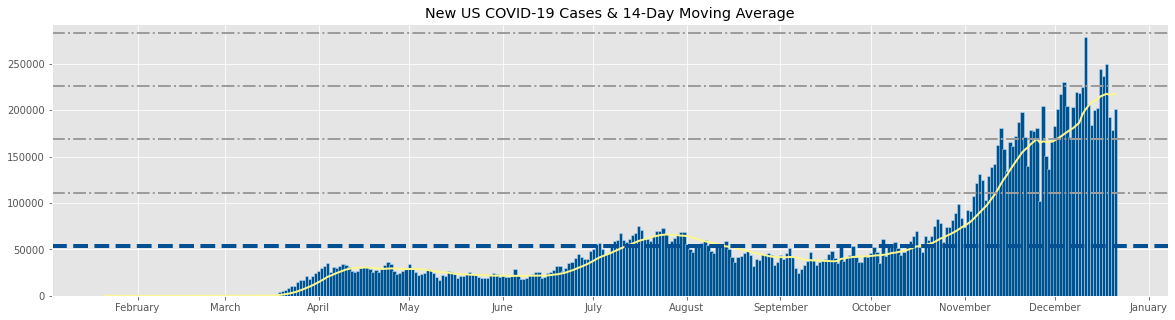

In [253]:
# Graph should appear here
import matplotlib.dates as mdates

months = mdates.MonthLocator()
month_fmt = mdates.DateFormatter('%B')

national_data.Daily_Cases

ax = plt.axes()
plt1 = plt. bar (national_data.index, national_data.Daily_Cases, width = 1.15, align = 'center', color = '#00518C', edgecolor = '#BAE2FF')
plt2 = plt.plot(national_data.index, national_data.mAvg_Daily_Cases, lw=2, color='#FAF693')
plt3 = plt.axhline(Daily_Cases_Mean, ls='--', lw=4, c='#055092')
plt4 = plt.axhline(Daily_Cases_Mean + Daily_Cases_STDEV, ls='-.', lw=2, c='#9C9C9C')
plt5 = plt.axhline(Daily_Cases_Mean + 2*Daily_Cases_STDEV, ls='-.', lw=2, c='#9C9C9C')
plt6 = plt.axhline(Daily_Cases_Mean + 3*Daily_Cases_STDEV, ls='-.', lw=2, c='#9C9C9C')
plt7 = plt.axhline(Daily_Cases_Mean + 4*Daily_Cases_STDEV, ls='-.', lw=2, c='#9C9C9C')

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(month_fmt)
plt.title('New US COVID-19 Cases & 14-Day Moving Average')

Text(0.5, 1.0, 'New US COVID-19 DEATHS & 14-Day Moving Average')

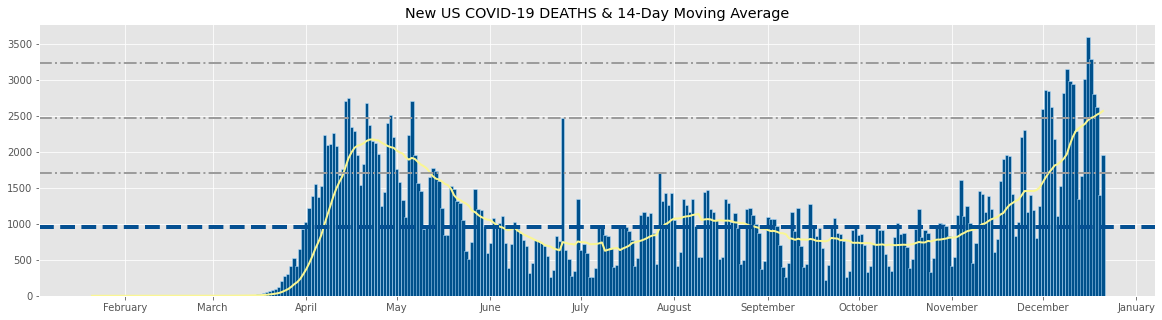

In [254]:
# Chart of new deaths nationwide
national_data.Daily_Deaths

ax = plt.axes()
plt1 = plt.bar(national_data.index, national_data.Daily_Deaths, width = 1.15, align = 'center', color = '#00518C', edgecolor = '#BAE2FF')
plt2 = plt.plot(national_data.index, national_data.mAvg_Daily_Deaths, lw=2, color='#FAF693')
plt3 = plt.axhline(Daily_Deaths_Mean, ls='--', lw=4, c='#055092')
plt4 = plt.axhline(Daily_Deaths_Mean + Daily_Deaths_STDEV, ls='-.', lw=2, c='#9C9C9C')
plt5 = plt.axhline(Daily_Deaths_Mean + 2*Daily_Deaths_STDEV, ls='-.', lw=2, c='#9C9C9C')
plt6 = plt.axhline(Daily_Deaths_Mean + 3*Daily_Deaths_STDEV, ls='-.', lw=2, c='#9C9C9C')

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(month_fmt)
plt.title('New US COVID-19 DEATHS & 14-Day Moving Average')

## Problem 5 - (Syntax and Libraries)

Create the three state epidemic curves

In [255]:
# Function to create a state plot here

def generate_state_curves(state):
    state_dataframe = merged_data[merged_data['state'] == state]
    state_Daily_Cases_Mean = state_dataframe['Daily_Cases'].mean()
    state_Daily_Cases_STDEV = state_dataframe['Daily_Cases'].std()
    state_Daily_Cases_Max = state_dataframe['Daily_Cases'].max()
    import matplotlib.dates as mdates
    months = mdates.MonthLocator()
    month_fmt = mdates.DateFormatter('%B')
    is_state = merged_data['state']==state
    state_data = merged_data[is_state]
    ax=plt.axes()
    plt1 = plt.bar(state_data.index, state_data.Daily_Cases, width = 1.15, align = 'center', color = '#00518C', edgecolor = '#BAE2FF')
    plt2 = plt.plot(state_data.index, state_data.mAvg_Daily_Cases, lw=2, color='#FAF693')
    plt3 = plt.axhline(state_Daily_Cases_Mean, ls='--', lw=4, c='#055092')
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(month_fmt)
    plt.title("Increase in Coronavirus Cases Each Day in {} and 14-day Moving Average".format(state))

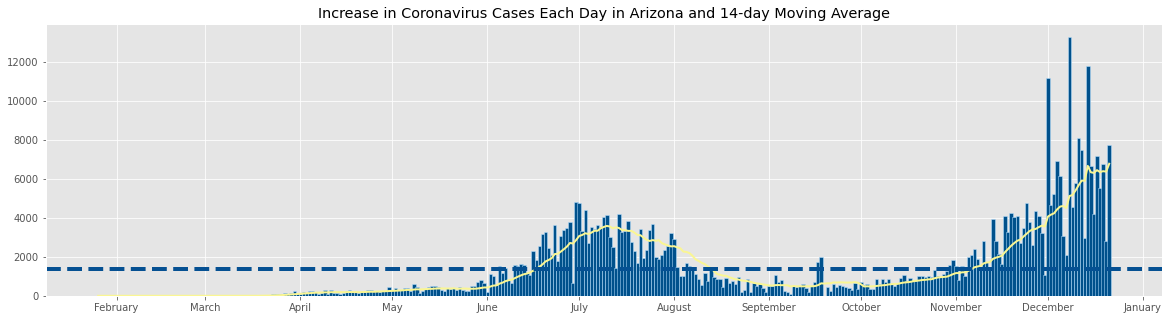

In [256]:
# Call function for first state plot
generate_state_curves('Arizona')

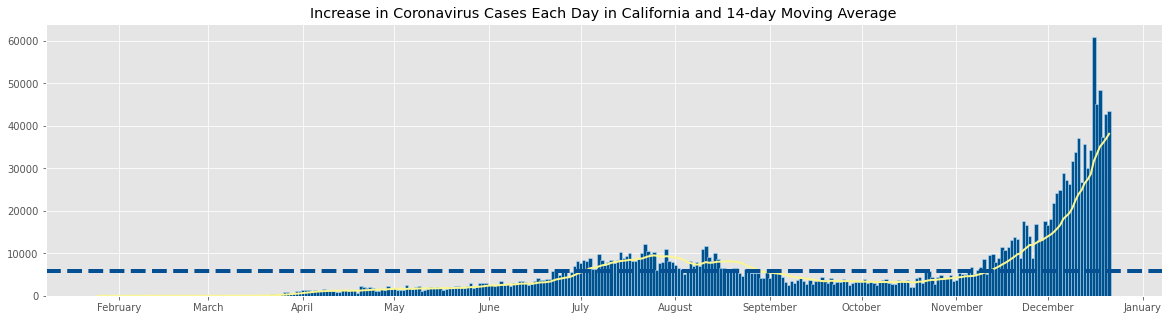

In [257]:
# Call function for second state plot
generate_state_curves('California')

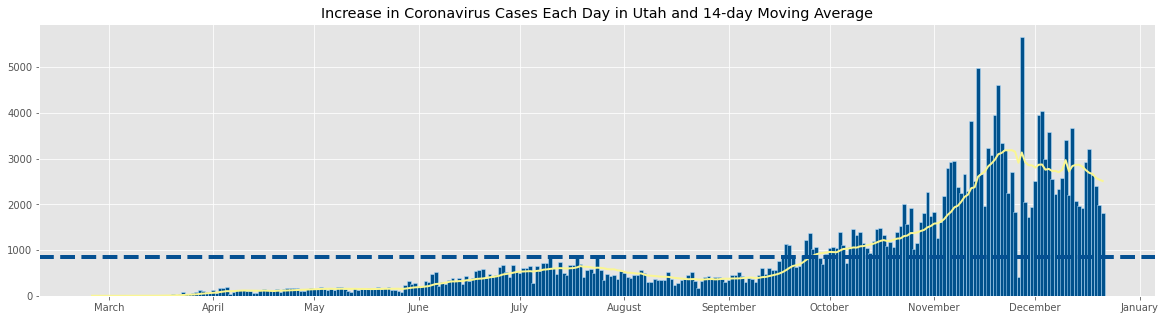

In [258]:
# Call function for third state plot
generate_state_curves('Utah')

## Problem 6 - (Syntax and Libraries)

Create the plot for the population adjusted case rates

In [259]:
#Create Adjusted Rates per 100,000

#Narrow the field to current date
current_date_df = merged_data.reset_index()
current_date_df = current_date_df[current_date_df.date == '2020-12-21']
current_date_df= current_date_df.set_index(['date'])
current_date_df.head()

,state,cases,deaths,Daily_Cases,Daily_Deaths,REGION,DIVISION,STNAME,POPESTIMATE2019,mAvg_Daily_Cases,mAvg_Daily_Deaths
date,,,,,,,,,,,
2020-12-21,Alabama,324832,4389,2380.0,0.0,3,6,Alabama,4903185,3757.357143,35.500000
2020-12-21,Alaska,43801,176,152.0,0.0,4,9,Alaska,731545,460.785714,2.923077
2020-12-21,Arizona,461345,7972,7744.0,1.0,4,8,Arizona,7278717,6784.357143,73.000000
2020-12-21,Arkansas,203107,3295,1457.0,58.0,3,7,Arkansas,3017804,2218.928571,41.571429
2020-12-21,California,1933083,22980,43408.0,244.0,4,9,California,39512223,38136.857143,209.142857


In [260]:
# Adjust the rate
current_date_df['adj_cases'] = current_date_df['cases'] / current_date_df['POPESTIMATE2019'] * 100000
current_date_df['adj_deaths'] = current_date_df['deaths'] / current_date_df['POPESTIMATE2019'] * 100000
current_date_df.head()

,state,cases,deaths,Daily_Cases,Daily_Deaths,REGION,DIVISION,STNAME,POPESTIMATE2019,mAvg_Daily_Cases,mAvg_Daily_Deaths,adj_cases,adj_deaths
date,,,,,,,,,,,,,
2020-12-21,Alabama,324832,4389,2380.0,0.0,3,6,Alabama,4903185,3757.357143,35.500000,6624.918293,89.513245
2020-12-21,Alaska,43801,176,152.0,0.0,4,9,Alaska,731545,460.785714,2.923077,5987.464886,24.058670
2020-12-21,Arizona,461345,7972,7744.0,1.0,4,8,Arizona,7278717,6784.357143,73.000000,6338.273627,109.524797
2020-12-21,Arkansas,203107,3295,1457.0,58.0,3,7,Arkansas,3017804,2218.928571,41.571429,6730.291298,109.185355
2020-12-21,California,1933083,22980,43408.0,244.0,4,9,California,39512223,38136.857143,209.142857,4892.367104,58.159218


In [261]:
#Sort by adjusted cases
current_date_df = current_date_df.sort_values(by='adj_cases', ascending=False)
current_date_df.head()

,state,cases,deaths,Daily_Cases,Daily_Deaths,REGION,DIVISION,STNAME,POPESTIMATE2019,mAvg_Daily_Cases,mAvg_Daily_Deaths,adj_cases,adj_deaths
date,,,,,,,,,,,,,
2020-12-21,North Dakota,90127,1239,82.0,2.0,2,4,North Dakota,762062,484.214286,15.071429,11826.728009,162.585196
2020-12-21,South Dakota,95074,1381,347.0,20.0,2,4,South Dakota,884659,612.428571,19.357143,10746.965780,156.105347
2020-12-21,Iowa,268736,3589,1407.0,0.0,2,4,Iowa,3155070,1625.071429,61.857143,8517.592320,113.753419
2020-12-21,Wisconsin,494353,4754,1629.0,9.0,2,3,Wisconsin,5822434,3638.428571,55.357143,8490.486968,81.649702
2020-12-21,Nebraska,157418,1530,905.0,25.0,2,4,Nebraska,1934408,1152.428571,20.428571,8137.786858,79.093966


Text(0.5, 1.0, 'Adjusted Cases per 100,000 Residents in Each State')

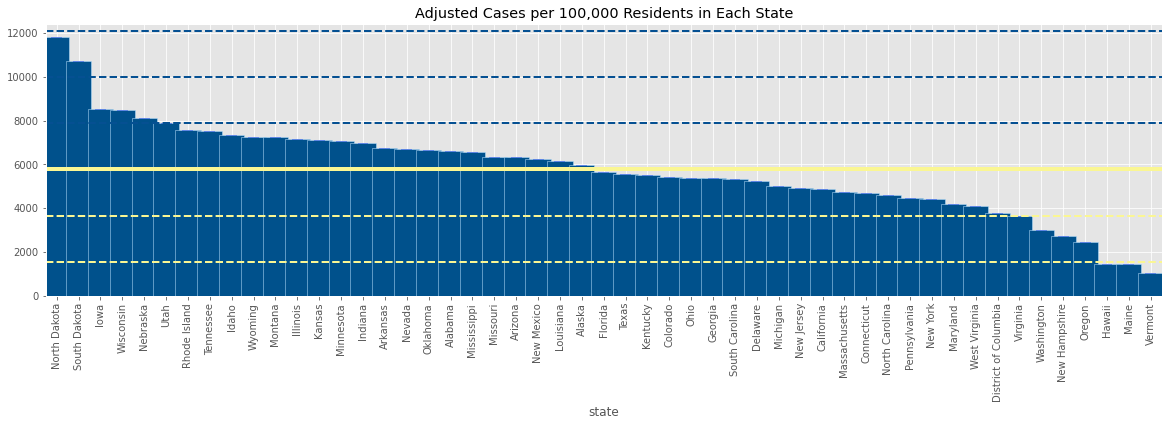

In [262]:
#Graph should appear here
adj_Cases_Avg = current_date_df['adj_cases'].mean()
adj_Cases_STDEV = current_date_df['adj_cases'].std()

ax = current_date_df.plot.bar(x='state', y='adj_cases', color='blue', legend=False)
plt1 = plt.bar(current_date_df.state, current_date_df.adj_cases, width = 1.15, align = 'center', color = '#00518C', edgecolor = '#BAE2FF')
plt2 = plt.axhline(adj_Cases_Avg, lw=4, color='#FAF693')
plt3 = plt.axhline(adj_Cases_Avg + adj_Cases_STDEV, ls='--', lw=2, c='#055092')
plt4 = plt.axhline(adj_Cases_Avg + 2*adj_Cases_STDEV, ls='--', lw=2, c='#055092')
plt5 = plt.axhline(adj_Cases_Avg + 3*adj_Cases_STDEV, ls='--', lw=2, c='#055092')
plt6 = plt.axhline(adj_Cases_Avg - adj_Cases_STDEV, ls='--', lw=2, color='#FAF693')
plt7 = plt.axhline(adj_Cases_Avg - 2*adj_Cases_STDEV, ls='--', lw=2, color='#FAF693')


# ax.xaxis.set_major_locator(months)
# ax.xaxis.set_major_formatter(month_fmt)
plt.title('Adjusted Cases per 100,000 Residents in Each State')

## Problem 7 - (Syntax and Libraries)

Create the plot for the population adjusted death rates

Text(0.5, 1.0, 'Adjusted Deaths per 100,000 Residents in Each State')

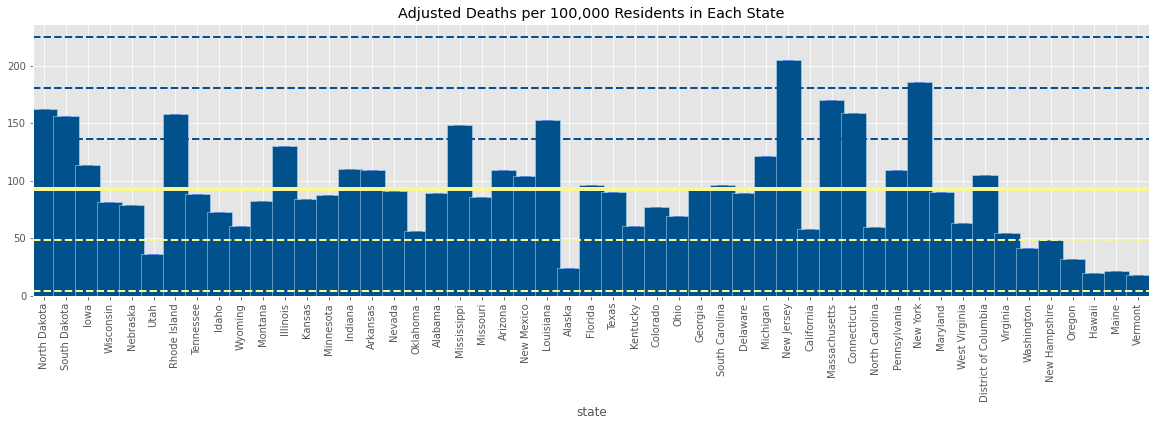

In [263]:
#Graph should appear here
adj_Deaths_Avg = current_date_df['adj_deaths'].mean()
adj_Deaths_STDEV = current_date_df['adj_deaths'].std()

ax = current_date_df.plot.bar(x='state', y='adj_deaths', color='blue', legend=False)
plt1 = plt.bar(current_date_df.state, current_date_df.adj_deaths, width = 1.15, align = 'center', color = '#00518C', edgecolor = '#BAE2FF')
plt2 = plt.axhline(adj_Deaths_Avg, lw=4, color='#FAF693')
plt3 = plt.axhline(adj_Deaths_Avg + adj_Deaths_STDEV, ls='--', lw=2, c='#055092')
plt4 = plt.axhline(adj_Deaths_Avg + 2*adj_Deaths_STDEV, ls='--', lw=2, c='#055092')
plt5 = plt.axhline(adj_Deaths_Avg + 3*adj_Deaths_STDEV, ls='--', lw=2, c='#055092')
plt6 = plt.axhline(adj_Deaths_Avg - adj_Deaths_STDEV, ls='--', lw=2, color='#FAF693')
plt7 = plt.axhline(adj_Deaths_Avg - 2*adj_Deaths_STDEV, ls='--', lw=2, color='#FAF693')


# ax.xaxis.set_major_locator(months)
# ax.xaxis.set_major_formatter(month_fmt)
plt.title('Adjusted Deaths per 100,000 Residents in Each State')

## Problem 8 - (Syntax and Libraries)

Create the scatter plot comparing the population adjusted case and death rates

In [264]:
current_date_df = current_date_df.sort_values(by='state')
current_date_df

,state,cases,deaths,Daily_Cases,Daily_Deaths,REGION,DIVISION,STNAME,POPESTIMATE2019,mAvg_Daily_Cases,mAvg_Daily_Deaths,adj_cases,adj_deaths
date,,,,,,,,,,,,,
2020-12-21,Alabama,324832,4389,2380.0,0.0,3,6,Alabama,4903185,3757.357143,35.500000,6624.918293,89.513245
2020-12-21,Alaska,43801,176,152.0,0.0,4,9,Alaska,731545,460.785714,2.923077,5987.464886,24.058670
2020-12-21,Arizona,461345,7972,7744.0,1.0,4,8,Arizona,7278717,6784.357143,73.000000,6338.273627,109.524797
2020-12-21,Arkansas,203107,3295,1457.0,58.0,3,7,Arkansas,3017804,2218.928571,41.571429,6730.291298,109.185355
2020-12-21,California,1933083,22980,43408.0,244.0,4,9,California,39512223,38136.857143,209.142857,4892.367104,58.159218
2020-12-21,Colorado,312713,4432,2191.0,12.0,4,8,Colorado,5758736,3288.785714,69.000000,5430.236774,76.961333
2020-12-21,Connecticut,167377,5676,4595.0,95.0,1,1,Connecticut,3565287,2252.357143,32.285714,4694.629072,159.201770
2020-12-21,Delaware,51056,871,440.0,9.0,3,5,Delaware,973764,738.928571,5.571429,5243.159534,89.446724
2020-12-21,District of Columbia,26740,742,139.0,5.0,3,5,District of Columbia,705749,244.357143,2.928571,3788.882450,105.136529


In [265]:
current_date_df.dtypes[:8]

state            object
cases             int64
deaths            int64
Daily_Cases     float64
Daily_Deaths    float64
REGION            int64
DIVISION          int64
STNAME           object
dtype: object

In [266]:
def Region_Name (row):
    if row['REGION'] == 1 :
        return 'Northeast'
    if row['REGION'] == 2 :
        return 'Midwest'
    if row['REGION'] == 3 :
        return 'South'
    if row['REGION'] == 4 :
        return 'West'
    
current_date_df['region_name'] = current_date_df.apply (lambda row: Region_Name(row), axis=1)

current_date_df['state_abb'] = (['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA', 'HI', 'ID', 
                            'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 
                            'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 
                            'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'])

current_date_df.head()

,state,cases,deaths,Daily_Cases,Daily_Deaths,REGION,DIVISION,STNAME,POPESTIMATE2019,mAvg_Daily_Cases,mAvg_Daily_Deaths,adj_cases,adj_deaths,region_name,state_abb
date,,,,,,,,,,,,,,,
2020-12-21,Alabama,324832,4389,2380.0,0.0,3,6,Alabama,4903185,3757.357143,35.500000,6624.918293,89.513245,South,AL
2020-12-21,Alaska,43801,176,152.0,0.0,4,9,Alaska,731545,460.785714,2.923077,5987.464886,24.058670,West,AK
2020-12-21,Arizona,461345,7972,7744.0,1.0,4,8,Arizona,7278717,6784.357143,73.000000,6338.273627,109.524797,West,AZ
2020-12-21,Arkansas,203107,3295,1457.0,58.0,3,7,Arkansas,3017804,2218.928571,41.571429,6730.291298,109.185355,South,AR
2020-12-21,California,1933083,22980,43408.0,244.0,4,9,California,39512223,38136.857143,209.142857,4892.367104,58.159218,West,CA


In [267]:
regions = current_date_df.groupby('region_name')

reg_count = current_date_df['region_name'].value_counts()
print(reg_count)

South        17
West         13
Midwest      12
Northeast     9
Name: region_name, dtype: int64


In [268]:
current_date_df['region_name'].astype('str')

date
2020-12-21        South
2020-12-21         West
2020-12-21         West
2020-12-21        South
2020-12-21         West
2020-12-21         West
2020-12-21    Northeast
2020-12-21        South
2020-12-21        South
2020-12-21        South
2020-12-21        South
2020-12-21         West
2020-12-21         West
2020-12-21      Midwest
2020-12-21      Midwest
2020-12-21      Midwest
2020-12-21      Midwest
2020-12-21        South
2020-12-21        South
2020-12-21    Northeast
2020-12-21        South
2020-12-21    Northeast
2020-12-21      Midwest
2020-12-21      Midwest
2020-12-21        South
2020-12-21      Midwest
2020-12-21         West
2020-12-21      Midwest
2020-12-21         West
2020-12-21    Northeast
2020-12-21    Northeast
2020-12-21         West
2020-12-21    Northeast
2020-12-21        South
2020-12-21      Midwest
2020-12-21      Midwest
2020-12-21        South
2020-12-21         West
2020-12-21    Northeast
2020-12-21    Northeast
2020-12-21        South
2020-12-21 

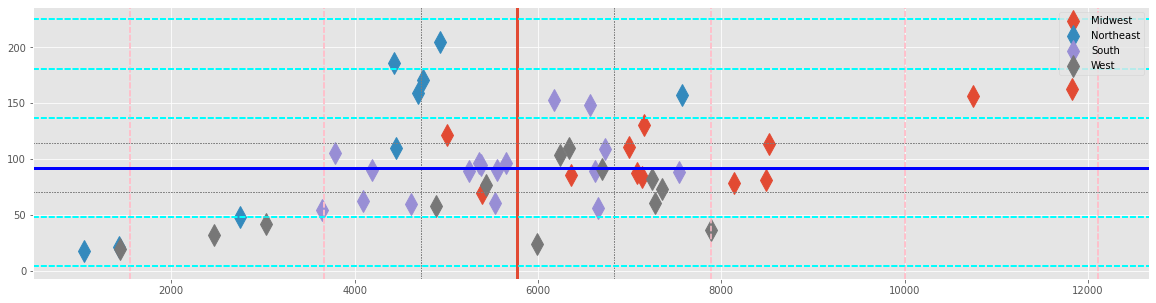

In [272]:
# Graph should appear here
for name, region_name in regions:
    plt.plot(region_name['adj_cases'], region_name['adj_deaths'], marker='d', linestyle='', ms=15, label=name)
#    plt.annotate('state_abb', (x,y)==name, textcoords='offset points', xytext=(5,5), ha='center')
#    plt.annotate('state_abb', ('adj_cases','adj_deaths'), textcoords='offset points', xytext=(5,5), ha='center')
    plt.axvline(adj_Cases_Avg, lw=3)
    plt.axvline(adj_Cases_Avg + adj_Cases_STDEV, ls='--', c='pink', lw=1.5)
    plt.axvline(adj_Cases_Avg - adj_Cases_STDEV, ls='--', c='pink', lw=1.5)
    plt.axvline(adj_Cases_Avg + 2*adj_Cases_STDEV, ls='--', c='pink', lw=1.5)
    plt.axvline(adj_Cases_Avg - 2*adj_Cases_STDEV, ls='--', c='pink', lw=1.5)
    plt.axvline(adj_Cases_Avg + 3*adj_Cases_STDEV, ls='--', c='pink', lw=1.5)
    plt.axvline(adj_Cases_Avg + 0.5*adj_Cases_STDEV, ls=':', c='gray', lw=1)
    plt.axvline(adj_Cases_Avg - 0.5*adj_Cases_STDEV, ls=':', c='gray', lw=1)
    plt.axhline(adj_Deaths_Avg, c='blue', lw=3)
    plt.axhline(adj_Deaths_Avg + adj_Deaths_STDEV, c='cyan', ls='--', lw=1.5)
    plt.axhline(adj_Deaths_Avg - adj_Deaths_STDEV, c='cyan', ls='--', lw=1.5)
    plt.axhline(adj_Deaths_Avg + 2*adj_Deaths_STDEV, c='cyan', ls='--', lw=1.5)
    plt.axhline(adj_Deaths_Avg - 2*adj_Deaths_STDEV, c='cyan', ls='--', lw=1.5)
    plt.axhline(adj_Deaths_Avg + 3*adj_Deaths_STDEV, c='cyan', ls='--', lw=1.5)
    plt.axhline(adj_Deaths_Avg + 0.5*adj_Deaths_STDEV, c='gray', ls=':', lw=1)
    plt.axhline(adj_Deaths_Avg - 0.5*adj_Deaths_STDEV, c='gray', ls=':', lw=1)
    plt.figsize=(40,30)
plt.legend(loc='upper right')
plt.show()

## Problem 9 - (Demonstrate Domain Expertise)

What stands out to you about this plot?  What would you like to investigate further?  How are you identifying the individual states that are worth investigating.  County level rates and populations are also available. How might this data be used to address some of the pressing questions about the pandemic?

## Problem 9 Response

#####One point that stands out are the outliers in the Midwest to the far right. They have relatively few deaths per case. Another is the group. of West and Northeast outliers to the far left. They have relatively few cases. The Northeast grouping in the upper left quadrant is interesting because of the relatively high number of deaths per case. However, probably most interesting are the two Western groupings towards the bottom of the bottom left quadrant. I would be very interested to know more about the two states whose number of cases are middling, but number of deaths are among the lowest.

#####I have not done it here, but to determine which states have the lowest rates, I would strive to understand which five have the lowest ratios of deaths to cases and which have the highest.

#####County level rates and populations would be interesting to explore, especially if we could add population density data to the mix, helping to determine if urbanicity is strongly correlated with death rate.

## Problem 10 - (Domain Expertise combined with Computation Thinking)

What additional questions did this exercise surface?  How would you go about addressing these questions?  What additional data would you need?  The great news is that tons of data is available already.  The NY Times has made all their COVID data available including data from surveys on things like mask usage, state lockdown policies, and attitudes about the virus and the response to the virus.

## Problem 10 Response
#####It would be very interesting to explore the variety of combinations between lockdown policies, actual mask usage, attitudes, etc. Do higher levels of mask usage actually result in a slower spread? Is the curve lengthened? Creating new columns at the state or county level would allow further granularity of data exploration. Some examples would be to create a column for ratio of deaths per case. This could be explored over time and overlayed on a plot to compar it with another column such as mask usage. I would focus on creating visualizations that would lead to potential questions to determine where to spend time.

#####Again, population density by county would be very interesting to overlay with rate of spread; additionally, the density of hospital beds to population would allow us to explore the availability of care based on the number of adjusted cases. This would be potentially interesting as potentially correlated with deaths per case and deaths per capita.

#####While imperfect, it would be valuable to overlay the timeline of lockdowns and other measures with rate of spread. Is there a point where it's too late?